In [5]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_theme(rc={'figure.figsize': (10, 5)})

from sklearn.model_selection import train_test_split,cross_val_predict,GridSearchCV,RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler,RobustScaler,OneHotEncoder,PolynomialFeatures
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as Imb_Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,precision_recall_curve,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,StackingClassifier,VotingClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

from sklearn.decomposition import PCA, IncrementalPCA # till 20K features
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection # >20k features
from sklearn.manifold import LocallyLinearEmbedding, MDS, Isomap, TSNE # Manifold could be better than Projection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # for classfication problems (larg distance between diffrent classes)

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.cluster import HDBSCAN # state of art
from sklearn.metrics import silhouette_score, silhouette_samples # 0 -> 1
from matplotlib.ticker import FixedLocator, FixedFormatter

In [6]:
import pandas as pd

data = {
    "اسم العمود": [
        "age", "job", "marital", "education", "default", "housing", "loan",
        "contact", "month", "day_of_week", "duration", "campaign", "pdays",
        "previous", "poutcome", "emp.var.rate", "cons.price.idx",
        "cons.conf.idx", "euribor3m", "nr.employed", "y"
    ],
    "الشرح بالعربية": [
        "العمر الرقمي للعميل",
        "نوع وظيفة العميل (مثل: موظف إداري، فني، عامل...)",
        "الحالة الاجتماعية (متزوج، أعزب، مطلق...)",
        "المستوى التعليمي (مثل: شهادة جامعية، تعليم أساسي...)",
        "هل لدى العميل تخلف عن سداد قرض سابق؟",
        "هل لدى العميل قرض سكني؟",
        "هل لدى العميل قرض شخصي؟",
        "وسيلة الاتصال المستخدمة (هاتف أرضي أو محمول)",
        "الشهر الذي تم فيه الاتصال",
        "اليوم الذي تم فيه الاتصال بالعميل",
        "مدة المكالمة بالثواني",
        "عدد المرات التي تم فيها الاتصال خلال الحملة الحالية",
        "عدد الأيام منذ آخر اتصال في حملة سابقة (999 = لم يتم الاتصال)",
        "عدد المرات التي تم الاتصال فيها في الحملات السابقة",
        "نتيجة الحملة السابقة (نجاح، فشل، غير موجود)",
        "معدل التغير في التوظيف (مؤشر اقتصادي)",
        "مؤشر أسعار المستهلك (للتضخم)",
        "مؤشر ثقة المستهلكين في الاقتصاد",
        "سعر فائدة يورايبور لمدة 3 أشهر",
        "عدد العاملين (مؤشر اقتصادي)",
        "هل اشترك العميل في وديعة لأجل؟ (نعم أو لا)"
    ]
}

df_columns_description = pd.DataFrame(data)
df_columns_description

,اسم العمود,الشرح بالعربية
0,age,العمر الرقمي للعميل
1,job,نوع وظيفة العميل (مثل: موظف إداري، فني، عامل...)
2,marital,الحالة الاجتماعية (متزوج، أعزب، مطلق...)
3,education,المستوى التعليمي (مثل: شهادة جامعية، تعليم أساسي...)
4,default,هل لدى العميل تخلف عن سداد قرض سابق؟
5,housing,هل لدى العميل قرض سكني؟
6,loan,هل لدى العميل قرض شخصي؟
7,contact,وسيلة الاتصال المستخدمة (هاتف أرضي أو محمول)
8,month,الشهر الذي تم فيه الاتصال
9,day_of_week,اليوم الذي تم فيه الاتصال بالعميل


In [144]:
df = pd.read_csv('bank-additional-full.csv',sep=';',na_values='unknown')

# Data Understanding

In [135]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [136]:
df['pdays'] = df['pdays'].replace(999,-1)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [138]:
df.isna().mean() * 100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

In [139]:

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,-0.741988,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,1.510327,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,-1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,-1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,-1.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,-1.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [140]:
for col in df.select_dtypes('O').columns:
    print(f'{col} : {df[col].nunique()}')
    print(df[col].value_counts())
    print('\n --- \n')

job : 11
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

 --- 

marital : 3
married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

 --- 

education : 7
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

 --- 

default : 2
no     32588
yes        3
Name: default, dtype: int64

 --- 

housing : 2
yes    21576
no     18622
Name: housing, dtype: int64

 --- 

loan : 2
no     33950
yes     6248
Name: loan, dtype: int64

 --- 

contact : 2
cellular     26144
telephone    15044
Name: contact, dtype: int64

 --- 

month : 10
may    13769
jul     7174
aug     61

In [141]:
df.drop(['default','duration'],axis=1,inplace=True)

In [142]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Feature Extraction

In [16]:
def get_season(month):
    if month in ['mar', 'apr', 'may']:
        return 'spring'
    elif month in ['jun', 'jul', 'aug']:
        return 'summer'
    elif month in ['sep', 'oct', 'nov']:
        return 'fall'
    else:
        return 'winter'
df['season'] = df['month'].apply(get_season)

In [17]:
df['has_any_loan'] = df.apply(lambda x: 1 if x['housing'] == 'yes' or x['loan'] == 'yes' else 0, axis=1)

In [18]:
df['contacted_before'] = df['pdays'].apply(lambda x: 0 if x == -1 else 1)

In [19]:
df['age_group'] = pd.cut(df['age'],5,labels=['young','adult','middle_aged','senior','elderly'])
df['age_group']

0        middle_aged
1        middle_aged
2              adult
3              adult
4        middle_aged
            ...     
41183         senior
41184          adult
41185    middle_aged
41186          adult
41187         senior
Name: age_group, Length: 41188, dtype: category
Categories (5, object): ['young' < 'adult' < 'middle_aged' < 'senior' < 'elderly']

In [20]:
df["economic_index"] = (
    df["emp.var.rate"] +
    df["cons.price.idx"] +
    df["cons.conf.idx"] +
    df["euribor3m"] +
    df["nr.employed"]
)

In [21]:
def campaign_length(x):
    if x == 1:
        return "short"
    elif 2 <= x <= 4:
        return "medium"
    else:
        return "long"

df["campaign_category"] = df["campaign"].apply(campaign_length)

In [22]:
df["interaction_intensity"] = df.apply(
    lambda row: row["campaign"] / (row["previous"] + 1), axis=1
)

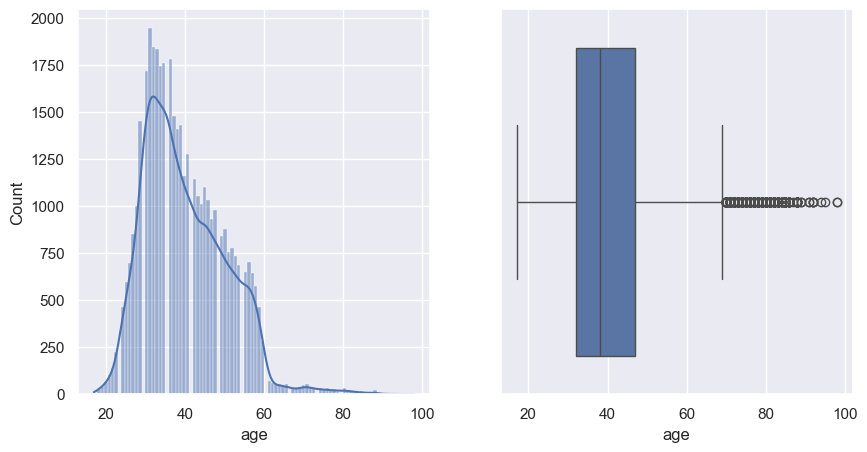

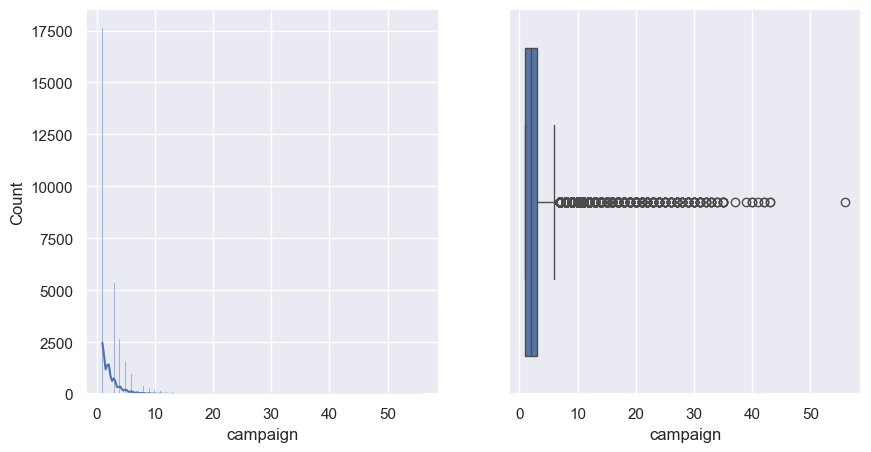

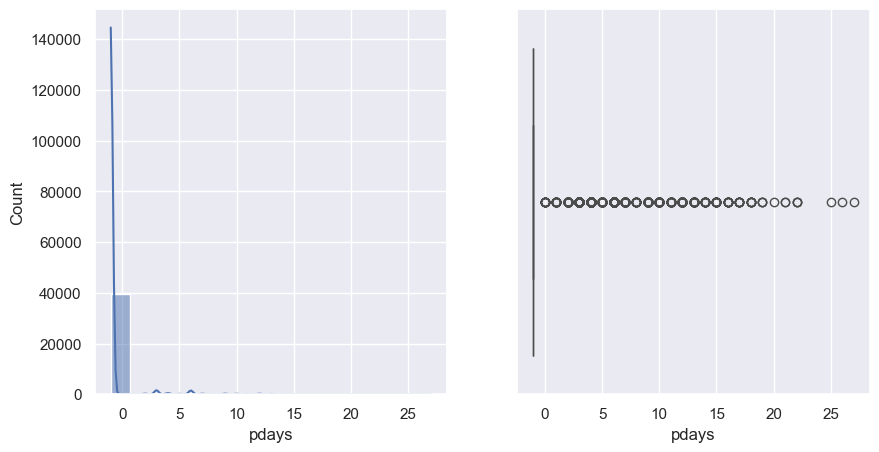

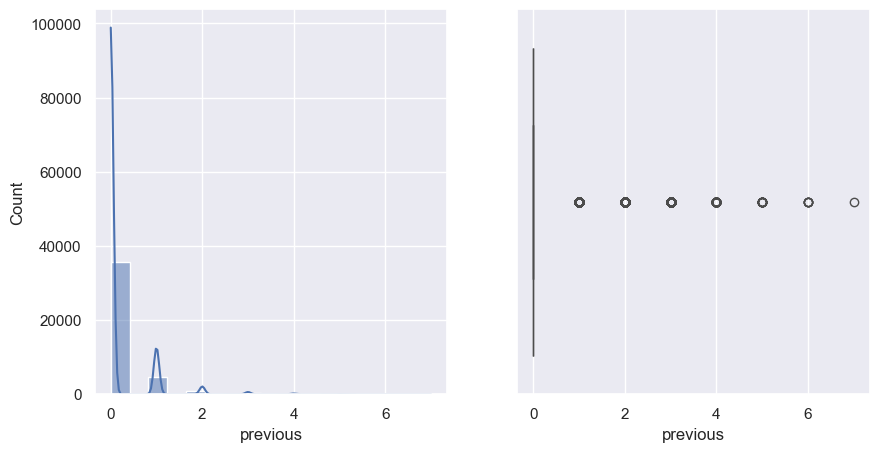

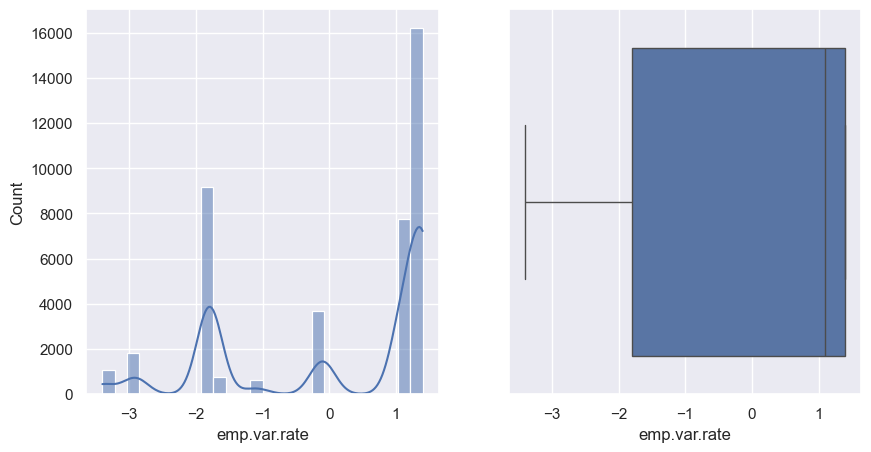

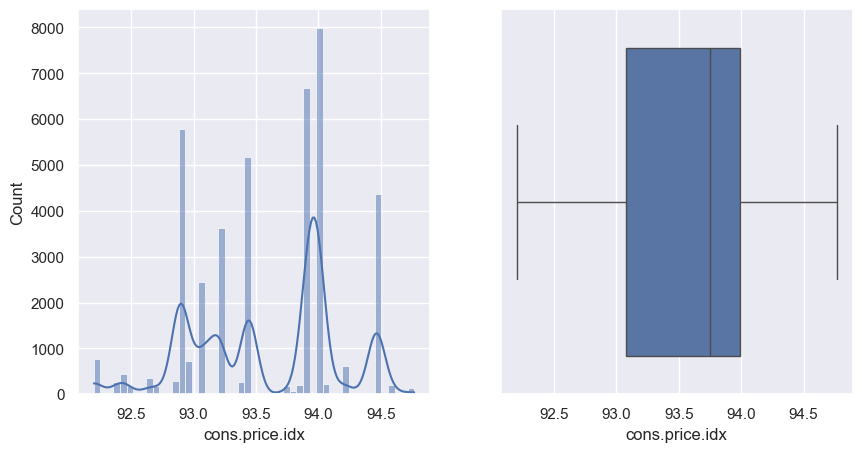

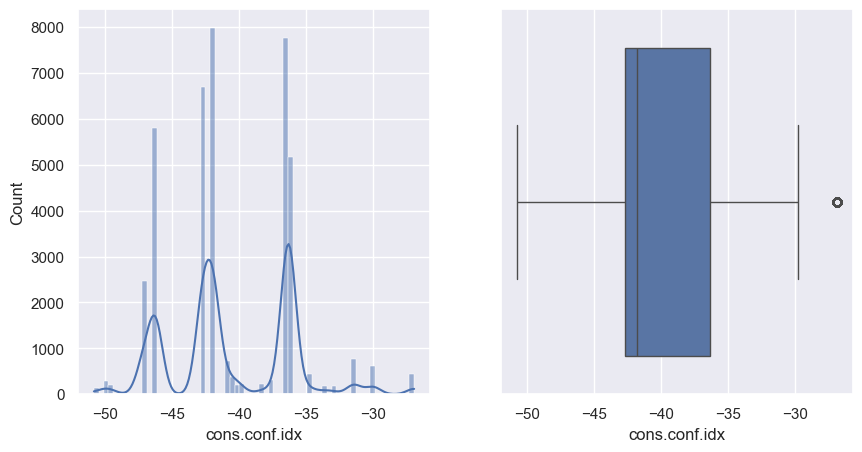

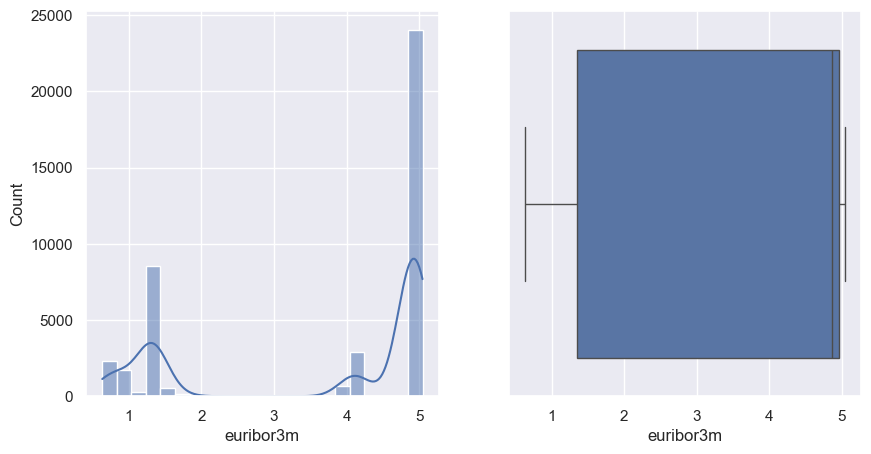

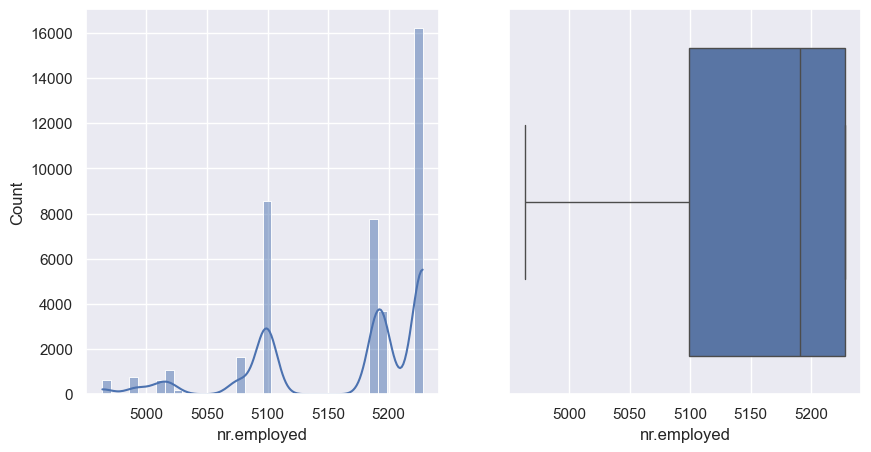

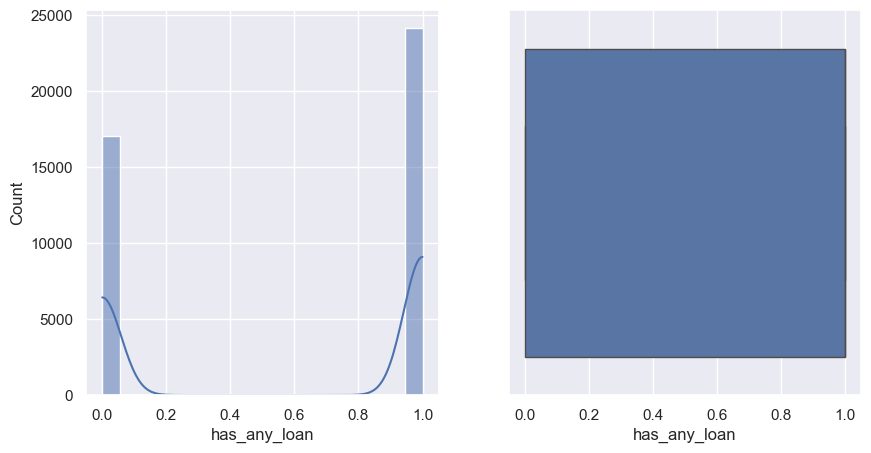

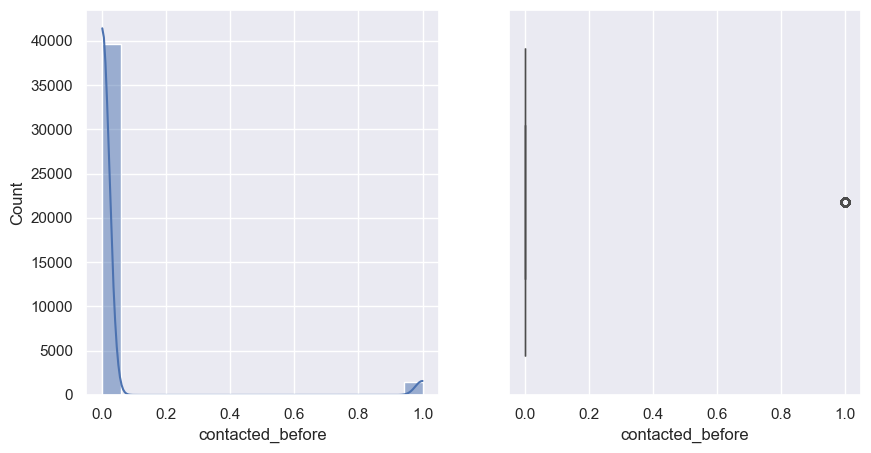

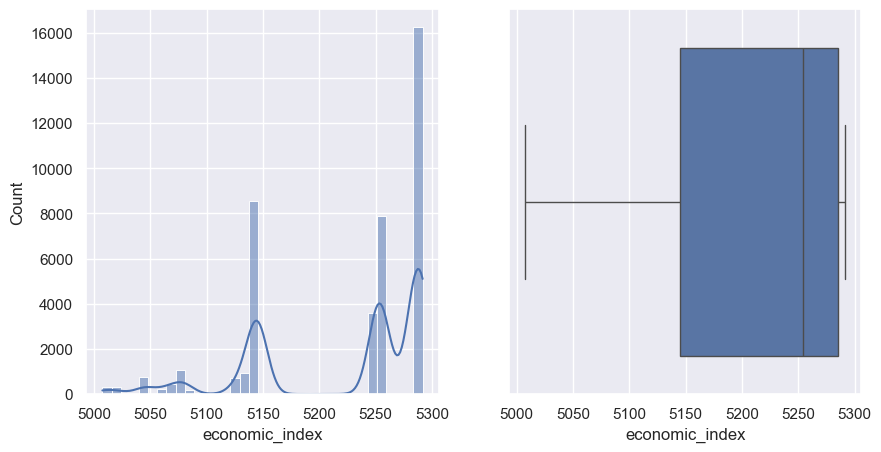

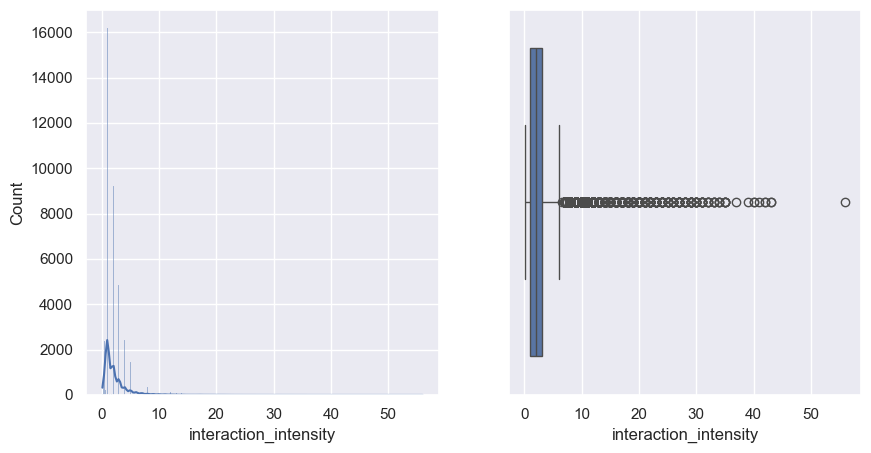

In [23]:
for col in df.select_dtypes('number').columns:
    fig,ax = plt.subplots(1,2)
    sns.histplot(df[col],kde=True,ax=ax[0])
    sns.boxplot(x=df[col],ax=ax[1])
    plt.show()

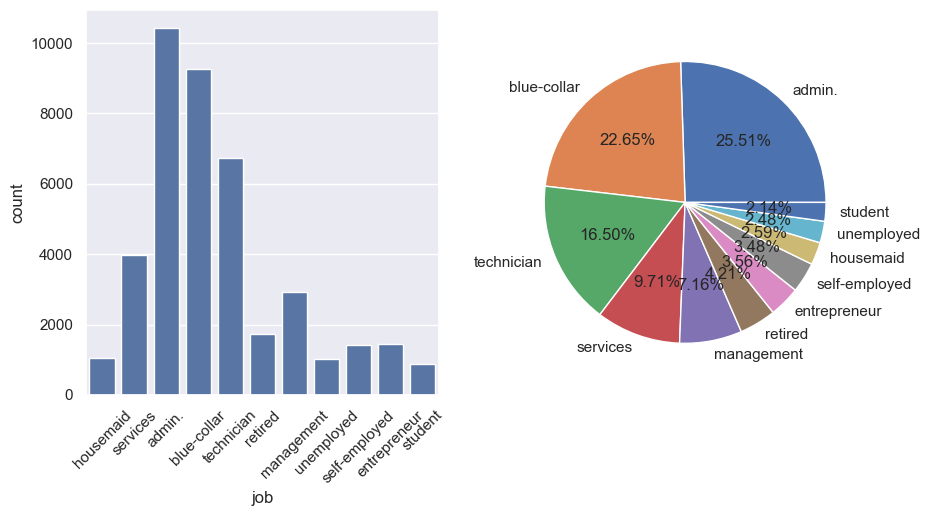

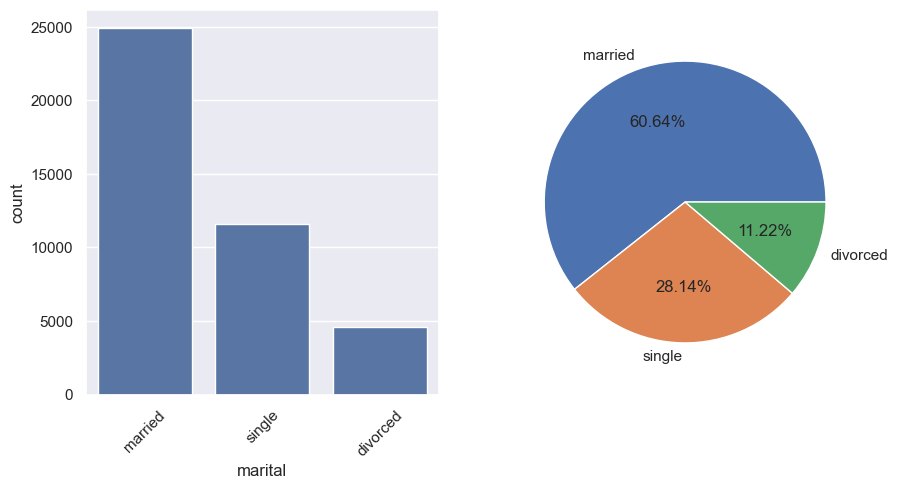

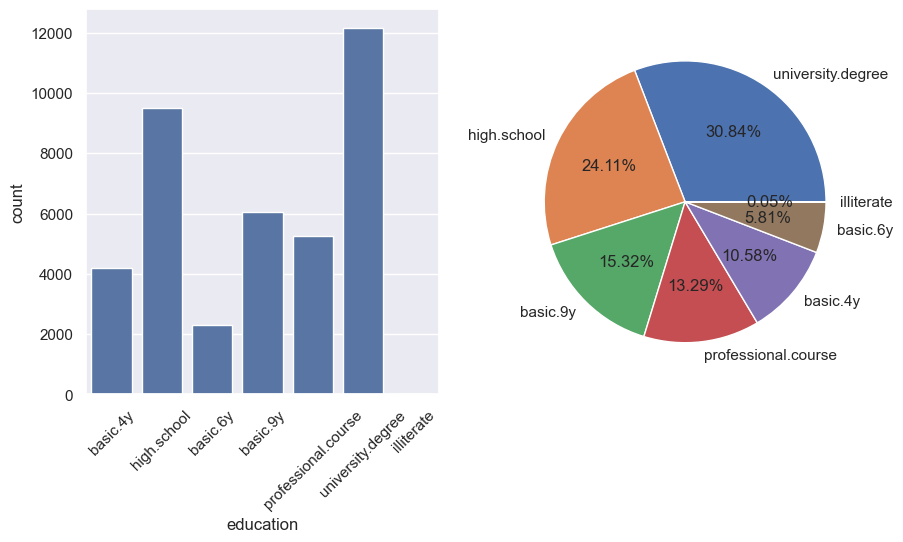

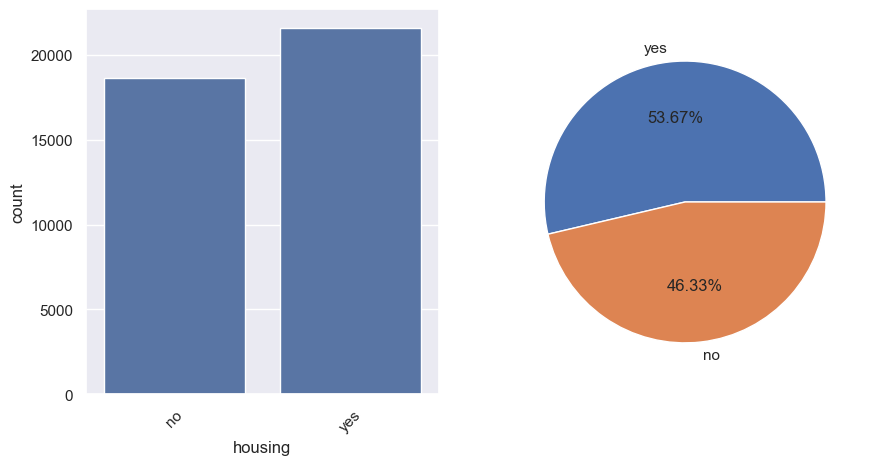

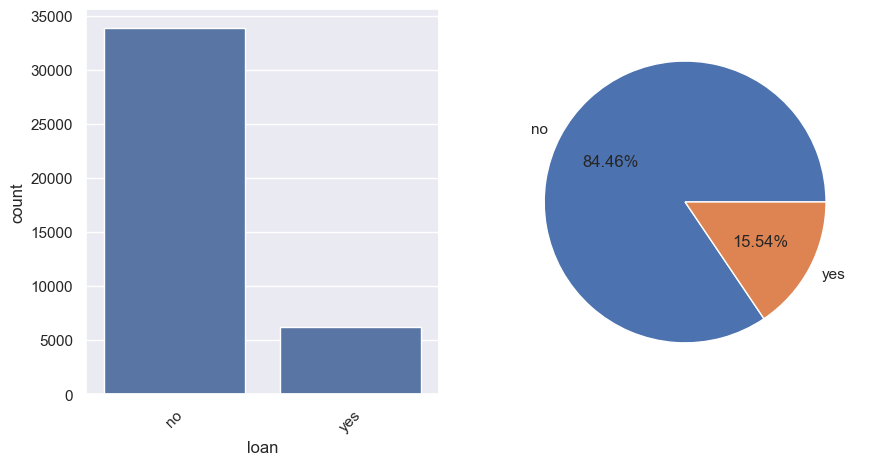

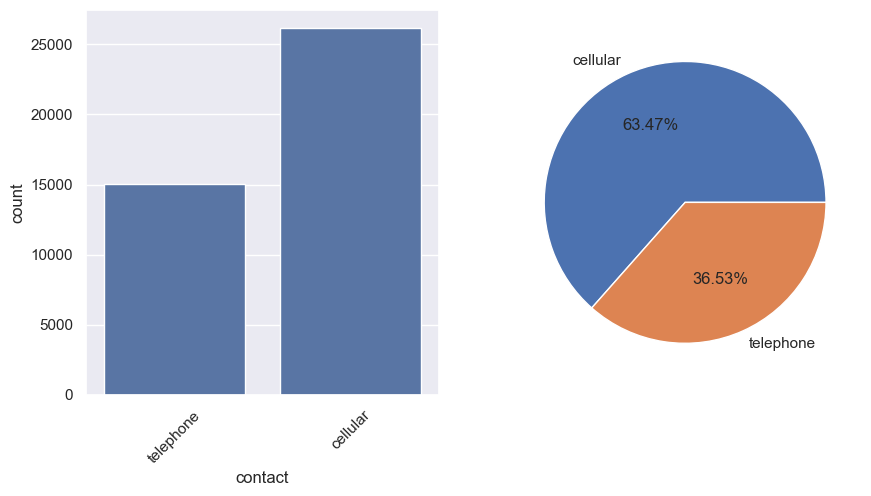

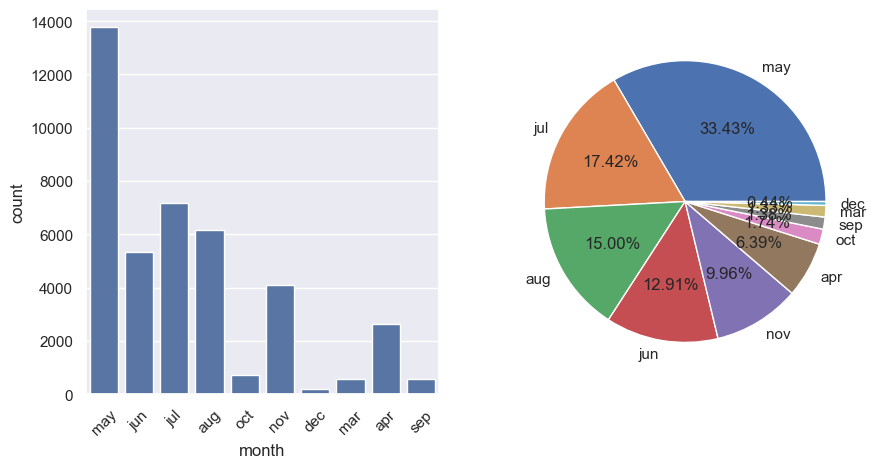

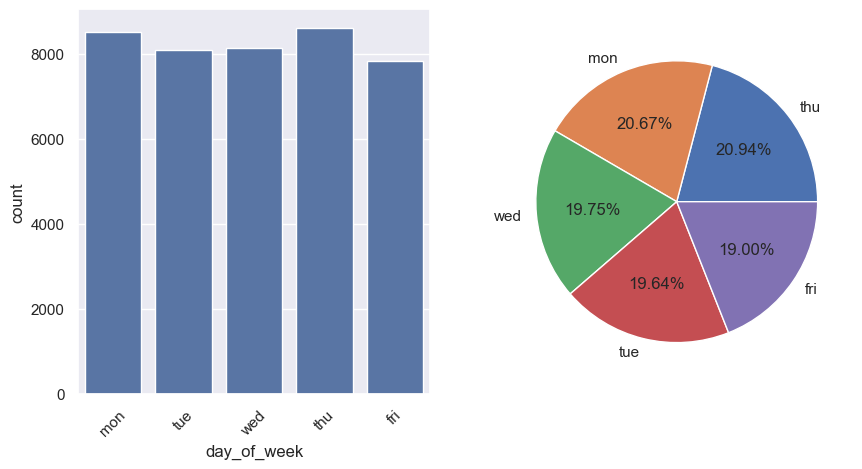

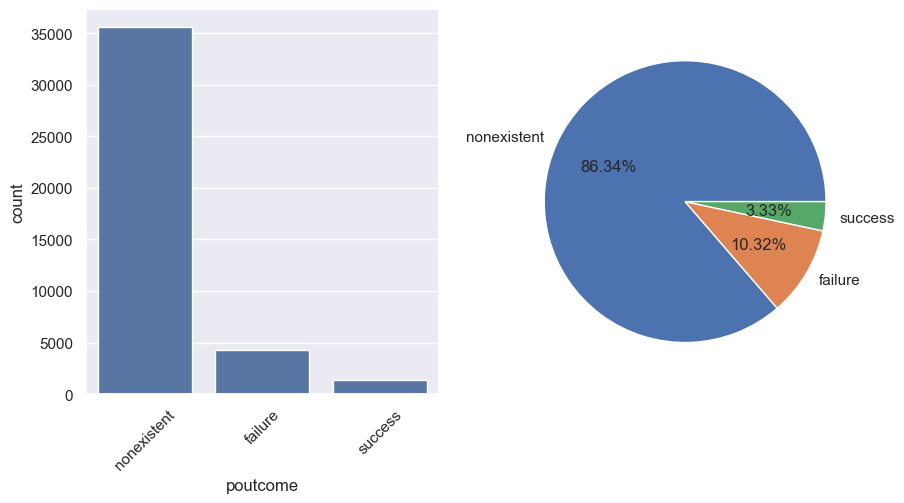

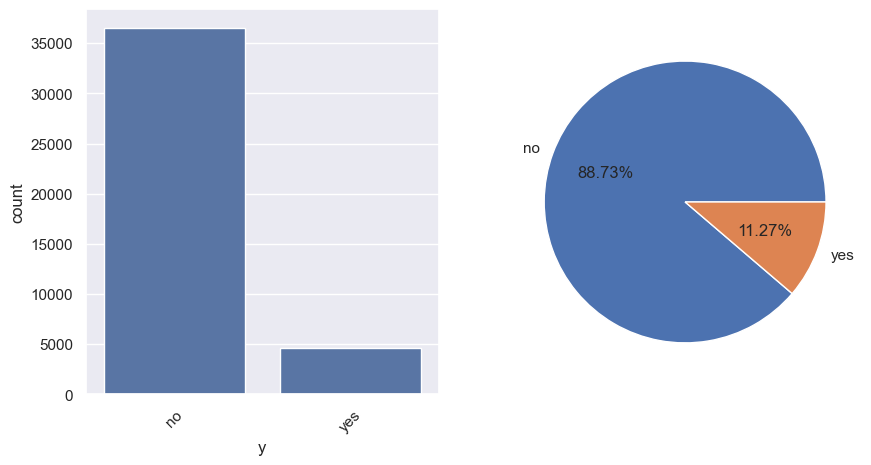

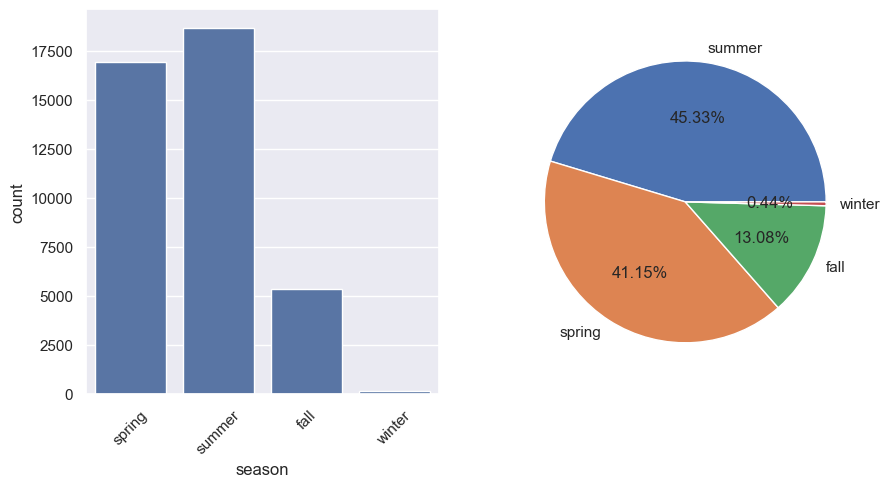

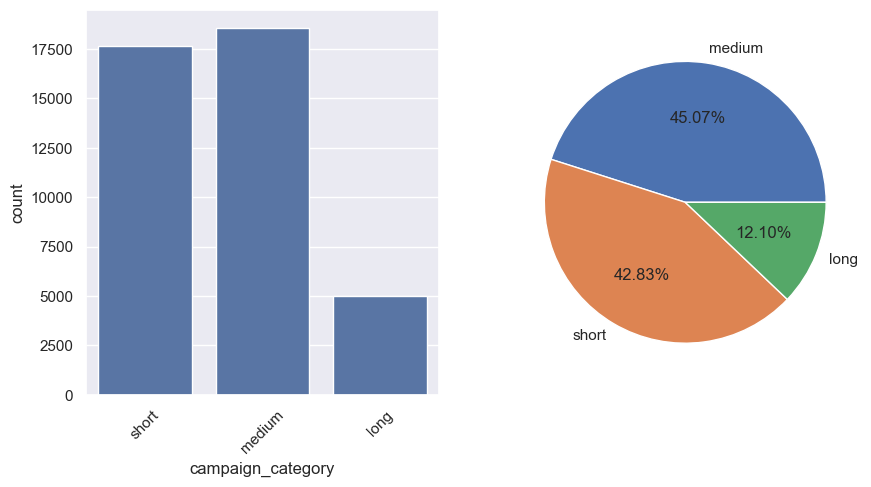

In [24]:
for col in df.select_dtypes('O'):
    fig,axes = plt.subplots(1,2)
    sns.countplot(x=df[col],ax=axes[0]).tick_params(axis='x',rotation=45)
    plt.pie(x=df[col].value_counts().values,labels=df[col].value_counts().index,autopct='%.2f%%')
    plt.show()

# Preprocessing

In [25]:
df.isna().mean() * 100

age                      0.000000
job                      0.801204
marital                  0.194231
education                4.202680
housing                  2.403613
loan                     2.403613
contact                  0.000000
month                    0.000000
day_of_week              0.000000
campaign                 0.000000
pdays                    0.000000
previous                 0.000000
poutcome                 0.000000
emp.var.rate             0.000000
cons.price.idx           0.000000
cons.conf.idx            0.000000
euribor3m                0.000000
nr.employed              0.000000
y                        0.000000
season                   0.000000
has_any_loan             0.000000
contacted_before         0.000000
age_group                0.000000
economic_index           0.000000
campaign_category        0.000000
interaction_intensity    0.000000
dtype: float64

In [26]:
df.duplicated().sum()

1997

In [27]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [28]:
X = df.drop(columns=['y'])
y = df['y'].map({'yes':1,'no':0})
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((31352, 25), (7839, 25), (31352,), (7839,))

In [29]:
X_train

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,season,has_any_loan,contacted_before,age_group,economic_index,campaign_category,interaction_intensity
304,33,admin.,divorced,high.school,no,no,telephone,may,mon,2,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,spring,0,0,young,5254.551,medium,2.0
27809,35,technician,married,university.degree,yes,no,cellular,apr,mon,3,-1,1,failure,-1.8,93.075,-47.1,1.405,5099.1,spring,1,0,adult,5144.680,medium,1.5
22539,43,technician,married,high.school,yes,no,telephone,aug,fri,3,-1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,summer,1,0,adult,5291.807,medium,3.0
7893,34,blue-collar,married,basic.4y,no,no,telephone,jun,tue,13,-1,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,summer,0,0,adult,5287.029,long,13.0
32228,41,housemaid,married,high.school,no,no,cellular,may,wed,2,-1,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,spring,0,0,adult,5145.274,medium,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24882,31,entrepreneur,single,university.degree,yes,no,cellular,nov,thu,1,-1,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,fall,1,0,young,5250.976,short,1.0
37092,50,admin.,married,university.degree,yes,no,cellular,dec,tue,3,-1,0,nonexistent,-3.0,92.713,-33.0,0.708,5023.5,winter,1,0,middle_aged,5080.921,medium,3.0
3484,40,admin.,married,university.degree,no,no,telephone,may,fri,1,-1,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,spring,0,0,adult,5254.553,short,1.0
32189,30,technician,married,basic.9y,no,no,cellular,may,wed,4,-1,1,failure,-1.8,92.893,-46.2,1.281,5099.1,spring,0,0,young,5145.274,medium,2.0


In [30]:
y_train

304      0
27809    0
22539    0
7893     0
32228    0
        ..
24882    0
37092    1
3484     0
32189    0
7787     0
Name: y, Length: 31352, dtype: int64

In [31]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,season,has_any_loan,contacted_before,age_group,economic_index,campaign_category,interaction_intensity
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,spring,0,0,middle_aged,5254.551,short,1.0
1,57,services,married,high.school,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,spring,0,0,middle_aged,5254.551,short,1.0
2,37,services,married,high.school,yes,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,spring,1,0,adult,5254.551,short,1.0
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,spring,0,0,adult,5254.551,short,1.0
4,56,services,married,high.school,no,yes,telephone,may,mon,1,-1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,spring,1,0,middle_aged,5254.551,short,1.0


In [32]:
# age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed ---> nan , scale
# job,month,day_of_week  ---> nan , binary_encode
# martial,contact,poutcome,season,age_group,education,housing,loan ---> nan , oh_encode

In [114]:
age_day_campaign_pdays_previous_pipe = Pipeline(steps=[
    ('handel_nan',SimpleImputer(strategy='most_frequent')),
    ('scale',RobustScaler())
])

job_month_pipe = Pipeline(steps=[
    ('handel_nan',SimpleImputer(strategy='most_frequent')),
    ('binary_encode',BinaryEncoder())
])

martial_contact_poutcome_pipe = Pipeline(steps=[
    ('handel_nan',SimpleImputer(strategy='most_frequent')),
    ('oh_encode',OneHotEncoder(sparse_output=False,drop='first'))
])

preprocessor = ColumnTransformer(transformers=[
    ('age_day_campaign_pdays_previous',age_day_campaign_pdays_previous_pipe,['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','interaction_intensity','economic_index']),
    ('job_month',job_month_pipe,['job','month','day_of_week']),
    ('martial_contact_poutcome_pipe',martial_contact_poutcome_pipe,['marital','housing','loan','contact','poutcome','season','age_group','education','campaign_category'])
    ],remainder='passthrough',force_int_remainder_cols=False)

In [34]:
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)

In [35]:
y_train.value_counts(normalize=True)

0    0.882687
1    0.117313
Name: y, dtype: float64

In [36]:
X_train_pre.shape

(31352, 46)

# Dimensionality Reduction

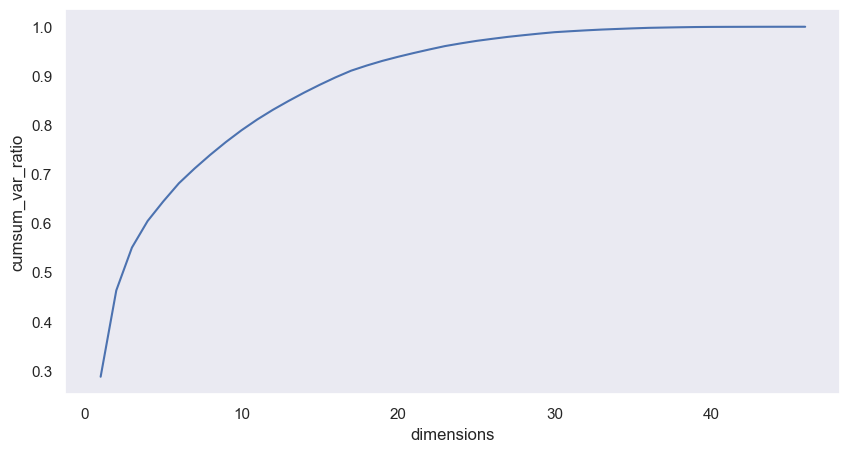

In [37]:
pca = PCA(random_state=42)
pca.fit_transform(X_train_pre)

dimensions = np.arange(1, 47)
cumsum_var_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(dimensions, cumsum_var_ratio)
plt.xlabel("dimensions")
plt.ylabel("cumsum_var_ratio")
plt.grid()
plt.show()

In [38]:
from kneed import KneeLocator
knee_point = KneeLocator(dimensions, cumsum_var_ratio, curve='concave', direction='increasing')
knee_point.knee

15

In [39]:
pca = PCA(n_components=15,random_state=42)
pca.fit_transform(X_train_pre)
sum(pca.explained_variance_ratio_)

0.8818598127334175

In [40]:
pca = PCA(n_components=0.95,random_state=42)
X_train_reduced = pca.fit_transform(X_train_pre)
X_test_reduced = pca.transform(X_test_pre)
len(pca.explained_variance_ratio_)

22

# Clustering

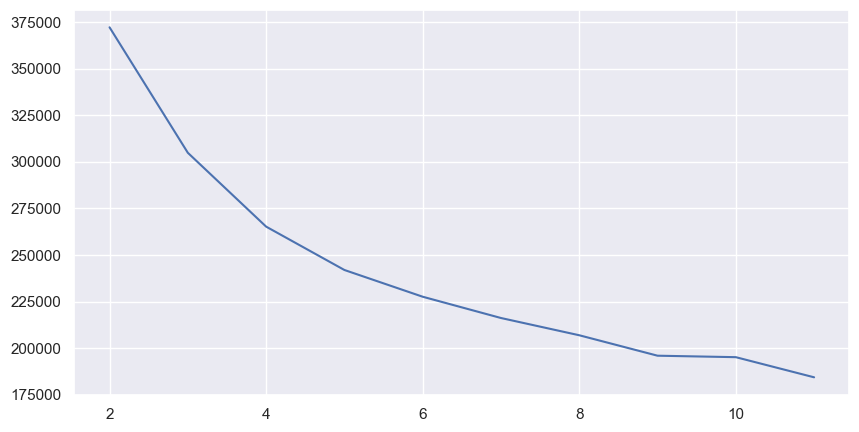

In [41]:
# Inertia Curve
inertias = []
k_range = range(2, 12)
for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10)
    kmeans.fit(X_train_reduced)
    inertias.append(kmeans.inertia_)
plt.plot(k_range, inertias)

In [42]:
knee_point = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
knee_point.knee

5

k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
k = 10
k = 11
k = 12


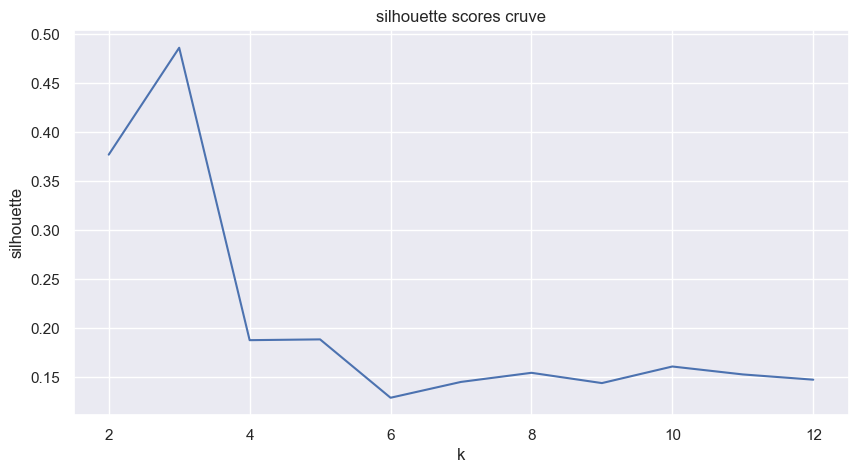

In [43]:
# Silhoutte
silhouette_values = []
clustering_models = []
k_range = range(2, 13)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, init='k-means++', max_iter=300)
    kmeans.fit(X_train_reduced)
    silhouette_values.append(silhouette_score(X_train_reduced, kmeans.labels_))
    clustering_models.append(kmeans)
    print(f'k = {k}')

plt.plot(k_range, silhouette_values)
plt.title("silhouette scores cruve")
plt.xlabel("k")
plt.ylabel('silhouette')
plt.show()

# Visualization

In [44]:
# tsne = TSNE(n_components=2, learning_rate="auto", random_state=42)
# X_2d = tsne.fit_transform(X_train_reduced)

In [45]:
# fig = px.scatter(
#     x=X_2d[:, 0],
#     y=X_2d[:, 1],
#     color=clustering_models[3].labels_,
#     title='2D Representation of Digits (TSNE)',
#     labels={'x': 'Dimension 1', 'y': 'Dimension 2'}
# )

# # Customize and display the plot
# fig.update_traces(marker=dict(size=5))
# fig.show()

In [46]:
new_feats = clustering_models[3].labels_

In [47]:
X_train_pre = np.c_[X_train_reduced,new_feats]

# Modeling

In [48]:
log_cls = LogisticRegression(C=1,max_iter=1000,random_state=42,class_weight='balanced')
log_cls.fit(X_train_pre,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000, random_state=42)

In [49]:
y_valid_pred = cross_val_predict(log_cls,X_train_pre, y_train,cv=3,method='predict')

print(f'Train Accuracy : {log_cls.score(X_train_pre, y_train)}')
print(f'Valid Accuracy : {accuracy_score(y_train,y_valid_pred)}')
print(f'Valid Precision : {precision_score(y_train,y_valid_pred)}')
print(f'Valid Recall : {recall_score(y_train,y_valid_pred)}')
print(f'Valid F1 : {f1_score(y_train,y_valid_pred)}')
confusion_matrix(y_train,y_valid_pred)

Train Accuracy : 0.8027239091605002
Valid Accuracy : 0.8012248022454708
Valid Precision : 0.3237161789066814
Valid Recall : 0.6375747688961392
Valid F1 : 0.42940853323567113


array([[22775,  4899],
       [ 1333,  2345]], dtype=int64)

In [50]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pre, y_train)

KNeighborsClassifier()

In [51]:
y_valid_pred = cross_val_predict(knn,X_train_pre, y_train,cv=3,method='predict')

print(f'Train Accuracy : {knn.score(X_train_pre, y_train)}')
print(f'Valid Accuracy : {accuracy_score(y_train,y_valid_pred)}')
print(f'Valid Precision : {precision_score(y_train,y_valid_pred)}')
print(f'Valid Recall : {recall_score(y_train,y_valid_pred)}')
print(f'Valid F1 : {f1_score(y_train,y_valid_pred)}')
confusion_matrix(y_train,y_valid_pred)

Train Accuracy : 0.9089053329931105
Valid Accuracy : 0.885398060729778
Valid Precision : 0.5231355470876429
Valid Recall : 0.26128330614464385
Valid F1 : 0.3485040797824116


array([[26798,   876],
       [ 2717,   961]], dtype=int64)

In [52]:
grid_params = {
    'n_neighbors': [3,5,7,9],
    'leaf_size': [15,20,30],
}

knn_grid = GridSearchCV(knn,grid_params,cv=3,scoring='f1',n_jobs=-1)
knn_grid.fit(X_train_pre, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [15, 20, 30],
                         'n_neighbors': [3, 5, 7, 9]},
             scoring='f1')

In [53]:
knn_grid.best_params_

{'leaf_size': 15, 'n_neighbors': 5}

In [54]:
knn_grid.best_score_

0.34834109493138293

In [55]:
nb = GaussianNB()
nb.fit(X_train_pre, y_train)

GaussianNB()

In [56]:
y_valid_pred = cross_val_predict(nb,X_train_pre, y_train,cv=3,method='predict')

print(f'Train Accuracy : {nb.score(X_train_pre, y_train)}')
print(f'Valid Accuracy : {accuracy_score(y_train,y_valid_pred)}')
print(f'Valid Precision : {precision_score(y_train,y_valid_pred)}')
print(f'Valid Recall : {recall_score(y_train,y_valid_pred)}')
print(f'Valid F1 : {f1_score(y_train,y_valid_pred)}')
confusion_matrix(y_train,y_valid_pred)

Train Accuracy : 0.8774559836693034
Valid Accuracy : 0.877615463128349
Valid Precision : 0.47347347347347346
Valid Recall : 0.38580750407830344
Valid F1 : 0.4251685393258427


array([[26096,  1578],
       [ 2259,  1419]], dtype=int64)

In [57]:
linear_svc = LinearSVC(C=1,random_state=42,class_weight='balanced')
linear_svc.fit(X_train_pre, y_train)

LinearSVC(C=1, class_weight='balanced', random_state=42)

In [58]:
y_valid_pred = cross_val_predict(linear_svc,X_train_pre, y_train,cv=3,method='predict')

print(f'Train Accuracy : {linear_svc.score(X_train_pre, y_train)}')
print(f'Valid Accuracy : {accuracy_score(y_train,y_valid_pred)}')
print(f'Valid Precision : {precision_score(y_train,y_valid_pred)}')
print(f'Valid Recall : {recall_score(y_train,y_valid_pred)}')
print(f'Valid F1 : {f1_score(y_train,y_valid_pred)}')
confusion_matrix(y_train,y_valid_pred)

Train Accuracy : 0.7955792293952539
Valid Accuracy : 0.794430977290125
Valid Precision : 0.3155579256099187
Valid Recall : 0.6435562805872757
Valid F1 : 0.42347258252079795


array([[22540,  5134],
       [ 1311,  2367]], dtype=int64)

In [59]:
# svm = SVC(C=1,kernel='poly',degree=2,coef0=1,random_state=42,class_weight='balanced')
# svm.fit(X_train_pre, y_train)

In [60]:
# y_valid_pred = cross_val_predict(svm,X_train_pre, y_train,cv=3,method='predict')

# print(f'Train Accuracy : {svm.score(X_train_pre, y_train)}')
# print(f'Valid Accuracy : {accuracy_score(y_train,y_valid_pred)}')
# print(f'Valid Precision : {precision_score(y_train,y_valid_pred)}')
# print(f'Valid Recall : {recall_score(y_train,y_valid_pred)}')
# print(f'Valid F1 : {f1_score(y_train,y_valid_pred)}')
# confusion_matrix(y_train,y_valid_pred)

In [61]:
# param_dist = {
#     'degree':[2,3,5],
#     'kernel':['poly','rbf'],
#     'gamma':[0.1,1,2,'scale']
# }

# svc_random_grid = RandomizedSearchCV(svm,param_dist,cv=3,scoring='f1',n_jobs=-1,n_iter=10)
# svc_random_grid.fit(X_train_pre, y_train)

In [62]:
# svc_random_grid.best_params_

In [63]:
# svc_random_grid.best_score_

In [64]:
dt = DecisionTreeClassifier(max_depth=5,random_state=42,class_weight='balanced')
dt.fit(X_train_pre, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [65]:
y_valid_pred = cross_val_predict(dt,X_train_pre, y_train,cv=3,method='predict')

print(f'Train Accuracy : {dt.score(X_train_pre, y_train)}')
print(f'Valid Accuracy : {accuracy_score(y_train,y_valid_pred)}')
print(f'Valid Precision : {precision_score(y_train,y_valid_pred)}')
print(f'Valid Recall : {recall_score(y_train,y_valid_pred)}')
print(f'Valid F1 : {f1_score(y_train,y_valid_pred)}')
confusion_matrix(y_train,y_valid_pred)

Train Accuracy : 0.8567555498851748
Valid Accuracy : 0.8366611380454197
Valid Precision : 0.37168771118619953
Valid Recall : 0.5682436106579662
Valid F1 : 0.4494140415009139


array([[24141,  3533],
       [ 1588,  2090]], dtype=int64)

In [66]:
param_grid = {
    'max_depth':[3,5,7,9,11,None]
}

dt_grid = GridSearchCV(dt,param_grid,cv=3,scoring='f1',n_jobs=-1)
dt_grid.fit(X_train_pre, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=5, random_state=42),
             n_jobs=-1, param_grid={'max_depth': [3, 5, 7, 9, 11, None]},
             scoring='f1')

In [67]:
dt_grid.best_params_

{'max_depth': 5}

In [68]:
dt_grid.best_score_

0.44998125800944994

### Poly

In [69]:
age_day_campaign_pdays_previous_pipe = Pipeline(steps=[
    ('handel_nan',SimpleImputer(strategy='most_frequent')),
    ('poly',PolynomialFeatures(degree=2,include_bias=False)),
    ('scale',RobustScaler())
])

job_month_pipe = Pipeline(steps=[
    ('handel_nan',SimpleImputer(strategy='most_frequent')),
    ('binary_encode',BinaryEncoder())
])

martial_contact_poutcome_pipe = Pipeline(steps=[
    ('handel_nan',SimpleImputer(strategy='most_frequent')),
    ('oh_encode',OneHotEncoder(sparse_output=False,drop='first'))
])

poly_preprocessor = ColumnTransformer(transformers=[
    ('age_day_campaign_pdays_previous',age_day_campaign_pdays_previous_pipe,['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','interaction_intensity','economic_index']),
    ('job_month',job_month_pipe,['job','month','day_of_week']),
    ('martial_contact_poutcome_pipe',martial_contact_poutcome_pipe,['marital','housing','loan','contact','poutcome','season','age_group','education','campaign_category'])
    ],remainder='passthrough',force_int_remainder_cols=False)

In [70]:
X_train_poly_pre = poly_preprocessor.fit_transform(X_train)
X_test_poly_pre = poly_preprocessor.transform(X_test)

In [71]:
log_cls_poly = LogisticRegression(C=1,max_iter=20000,random_state=42,class_weight='balanced')
log_cls_poly.fit(X_train_poly_pre,y_train)

f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, class_weight='balanced', max_iter=20000,
                   random_state=42)

In [72]:
y_valid_pred = cross_val_predict(log_cls_poly,X_train_poly_pre, y_train,cv=3,method='predict')

print(f'Train Accuracy : {log_cls_poly.score(X_train_poly_pre, y_train)}')
print(f'Valid Accuracy : {accuracy_score(y_train,y_valid_pred)}')
print(f'Valid Precision : {precision_score(y_train,y_valid_pred)}')
print(f'Valid Recall : {recall_score(y_train,y_valid_pred)}')
print(f'Valid F1 : {f1_score(y_train,y_valid_pred)}')
confusion_matrix(y_train,y_valid_pred)

f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Train Accuracy : 0.8236476141872927
Valid Accuracy : 0.824445011482521
Valid Precision : 0.35707576706324357
Valid Recall : 0.620174007612833
Valid F1 : 0.4532088217762766


f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[23567,  4107],
       [ 1397,  2281]], dtype=int64)

In [73]:
# log_poly_pipe = Pipeline(steps=[
#     ('poly_preprocessor', poly_preprocessor),
#     ('model', LogisticRegression(C=1,max_iter=20000,random_state=42,class_weight='balanced')),
# ])

# param_grid = {
#     'poly_preprocessor__age_day_campaign_pdays_previous__poly__degree':[2,3,4,5]
# }

# log_poly_grid = GridSearchCV(log_poly_pipe,param_grid,cv=3,scoring='f1',n_jobs=-1)
# log_poly_grid.fit(X_train, y_train)

In [74]:
# log_poly_grid.best_params_

In [75]:
# log_poly_grid.best_score_

In [76]:
linear_svc_poly = LinearSVC(C=1,max_iter=10000,random_state=42,class_weight='balanced')
linear_svc_poly.fit(X_train_poly_pre, y_train)

LinearSVC(C=1, class_weight='balanced', max_iter=10000, random_state=42)

In [77]:
y_valid_pred = cross_val_predict(linear_svc_poly,X_train_poly_pre, y_train,cv=3,method='predict')

print(f'Train Accuracy : {linear_svc_poly.score(X_train_poly_pre, y_train)}')
print(f'Valid Accuracy : {accuracy_score(y_train,y_valid_pred)}')
print(f'Valid Precision : {precision_score(y_train,y_valid_pred)}')
print(f'Valid Recall : {recall_score(y_train,y_valid_pred)}')
print(f'Valid F1 : {f1_score(y_train,y_valid_pred)}')
confusion_matrix(y_train,y_valid_pred)

Train Accuracy : 0.8245406991579485
Valid Accuracy : 0.8190865016585863
Valid Precision : 0.34889360412246134
Valid Recall : 0.6258836324089179
Valid F1 : 0.4480342545737641


array([[23378,  4296],
       [ 1376,  2302]], dtype=int64)

In [78]:
linearsvc_poly_pipe = Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('model', LinearSVC(C=1,max_iter=20000,random_state=42,class_weight='balanced')),
])

param_grid = {
    'poly_preprocessor__age_day_campaign_pdays_previous__poly__degree':[2,3,4,5]
}

linearsvc_poly_grid = GridSearchCV(linearsvc_poly_pipe,param_grid,cv=3,scoring='f1',n_jobs=-1)
linearsvc_poly_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly_preprocessor',
                                        ColumnTransformer(force_int_remainder_cols=False,
                                                          remainder='passthrough',
                                                          transformers=[('age_day_campaign_pdays_previous',
                                                                         Pipeline(steps=[('handel_nan',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False)),
                                                                                         ('scale',
                                                                                          RobustScaler())]),
                                                                         ['age',
                                                                          'campaign'...
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['marital',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'poutcome',
                                                                          'season',
                                                                          'age_group',
                                                                          'education',
                                                                          'campaign_category'])])),
                                       ('model',
                                        LinearSVC(C=1, class_weight='balanced',
                                                  max_iter=20000,
                                                  random_state=42))]),
             n_jobs=-1,
             param_grid={'poly_preprocessor__age_day_campaign_pdays_previous__poly__degree': [2,
                                                                                              3,
                                                                                              4,
                                                                                              5]},
             scoring='f1')

In [79]:
linearsvc_poly_grid.best_params_

{'poly_preprocessor__age_day_campaign_pdays_previous__poly__degree': 2}

In [80]:
linearsvc_poly_grid.best_score_

0.45069653812439453

# Oversample

In [81]:
# Logestic Regression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

log_oversampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=20000, random_state=42))
    ])
log_oversampling_pipeline.fit(X_train, y_train)
y_train_pred = log_oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    log_oversampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=20000, random_state=42))
    ])

    log_oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = log_oversampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.8218933401377903
At fold 1


f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At fold 2


f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At fold 3


f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At fold 4


f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At fold 5
Average Valid Accuracy: 0.8196287714109938
Average Valid Precsion: 0.348831493342062
Average Valid Recall: 0.6193548506359066
Average Valid F1 Score: 0.4462554122625614


f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
# KNN
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

knn_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=5,n_jobs=-1))
    ])
knn_oversampling_pipeline.fit(X_train, y_train)
y_train_pred = knn_oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    knn_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=5,n_jobs=-1))
    ])

    knn_oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = knn_oversampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.831781066598622
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7253763596739199
Average Valid Precsion: 0.2370065440166252
Average Valid Recall: 0.604131174208814
Average Valid F1 Score: 0.3404459052279316


In [83]:
# Naive Bayes
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

nb_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", GaussianNB())
    ])
nb_oversampling_pipeline.fit(X_train, y_train)
y_train_pred = nb_oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    nb_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", GaussianNB())
    ])

    nb_oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = nb_oversampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8528961469762695
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8519392855952962
Average Valid Precsion: 0.39144387828512234
Average Valid Recall: 0.47171805678793255
Average Valid F1 Score: 0.42771057909985


In [84]:
# Linear SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

nb_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LinearSVC(C=1,max_iter=1000,random_state=42,class_weight='balanced'))
    ])
nb_oversampling_pipeline.fit(X_train, y_train)
y_train_pred = nb_oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    nb_oversampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LinearSVC(C=1,max_iter=1000,random_state=42,class_weight='balanced'))
    ])

    nb_oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = nb_oversampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8164391426384282
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8023091280919715
Average Valid Precsion: 0.32558074958431155
Average Valid Recall: 0.6378482697426796
Average Valid F1 Score: 0.4309882363967577


In [85]:
# Decision Tree
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

dt_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=9,random_state=42))
    ])
dt_oversampling_pipeline.fit(X_train, y_train)
y_train_pred = dt_oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    dt_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=9,random_state=42))
    ])

    dt_oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = dt_oversampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8764991069150293
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8670575853966398
Average Valid Precsion: 0.4407756148999996
Average Valid Recall: 0.4907519964507542
Average Valid F1 Score: 0.46425432507557324


## Grid Search

In [86]:
# KNN

params_grid = {'model__n_neighbors': [5,19,31,41,51],
               'model__leaf_size':[30, 40, 50, 80],
               }


oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50)) # 135 Model
    ])

knn_grid = GridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")

    knn_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_knn_model = knn_grid.best_estimator_
    y_valid_pred = knn_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.6968934847810877
Average Valid Precsion: 0.23584668431524086
Average Valid Recall: 0.7069040224785565
Average Valid F1 Score: 0.3536842050029369


In [87]:
best_knn_model # only trained on 80%(80% train)

f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_day_campaign_pdays_previous',
                                                  Pipeline(steps=[('handel_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed',
                                                   'interaction_inten...
                                                 ('martial_contact_poutcome_pipe',
                                                  Pipeline(steps=[('handel_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oh_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['marital', 'housing', 'loan',
                                                   'contact', 'poutcome',
                                                   'season', 'age_group',
                                                   'education',
                                                   'campaign_category'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier(n_neighbors=51))])

In [88]:
knn_grid.best_params_

{'model__leaf_size': 30, 'model__n_neighbors': 51}

In [89]:
# DT

from sklearn.model_selection import KFold
params_grid = {'model__max_depth': [3, 5, 7],
               'model__max_leaf_nodes':[5, 10, 20],
               'model__min_samples_split':[15,20, 25],
               'model__min_samples_leaf':[5,10, 20],
               }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, random_state=42, min_samples_split=20, min_samples_leaf=10)) # 135 Model
    ])

dt_clf_grid = GridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")

    dt_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_dt_clf_model = dt_clf_grid.best_estimator_
    y_valid_pred = dt_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8696738613760159
Average Valid Precsion: 0.45466920711521464
Average Valid Recall: 0.5217369121561668
Average Valid F1 Score: 0.4847782799301541


In [115]:
best_dt_clf_model # only trained on 80%(80% train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_day_campaign_pdays_previous',
                                                  Pipeline(steps=[('handel_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed',
                                                   'interaction_inten...
                                                                  ('oh_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['marital', 'housing', 'loan',
                                                   'contact', 'poutcome',
                                                   'season', 'age_group',
                                                   'education',
                                                   'campaign_category'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [91]:
dt_clf_grid.best_params_

{'model__max_depth': 3,
 'model__max_leaf_nodes': 10,
 'model__min_samples_leaf': 5,
 'model__min_samples_split': 15}

# Undersample

In [92]:
# Logestic Regression
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

log_undersampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=20000, random_state=42))
    ])
log_undersampling_pipeline.fit(X_train, y_train)
y_train_pred = log_undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    log_undersampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=20000, random_state=42))
    ])

    log_undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = log_undersampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.8220209237050268
At fold 1


f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At fold 2


f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At fold 3


f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At fold 4


f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


At fold 5
Average Valid Accuracy: 0.8164710038385856
Average Valid Precsion: 0.34481214091191614
Average Valid Recall: 0.6266947648624667
Average Valid F1 Score: 0.444833544222889


f:\anaconda\envs\eda_px_st_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
# KNN
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

knn_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=5,n_jobs=-1))
    ])
knn_undersampling_pipeline.fit(X_train, y_train)
y_train_pred = knn_undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    knn_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=5,n_jobs=-1))
    ])

    knn_undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = knn_undersampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.745757846389385
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7228244136384364
Average Valid Precsion: 0.24613690241011565
Average Valid Recall: 0.6604081632653062
Average Valid F1 Score: 0.3585956365433391


In [94]:
# Naive Bayes
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

nb_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", GaussianNB())
    ])
nb_undersampling_pipeline.fit(X_train, y_train)
y_train_pred = nb_undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    nb_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", GaussianNB())
    ])

    nb_undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = nb_undersampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8526090839499872
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8637408571951035
Average Valid Precsion: 0.42245055925625435
Average Valid Recall: 0.4396384205856256
Average Valid F1 Score: 0.43087100268629575


In [95]:
# Linear SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

linear_svc_undersampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LinearSVC(C=1,max_iter=1000,random_state=42,class_weight='balanced'))
    ])
linear_svc_undersampling_pipeline.fit(X_train, y_train)
y_train_pred = linear_svc_undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    linear_svc_undersampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LinearSVC(C=1,max_iter=1000,random_state=42,class_weight='balanced'))
    ])

    linear_svc_undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = linear_svc_undersampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.7936654758867058
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7962179059222259
Average Valid Precsion: 0.31956612094788506
Average Valid Recall: 0.6460011830819286
Average Valid F1 Score: 0.4272008772119089


In [96]:
# Decision Tree
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

dt_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=9,random_state=42))
    ])
dt_undersampling_pipeline.fit(X_train, y_train)
y_train_pred = dt_undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    dt_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=9,random_state=42))
    ])

    dt_undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = dt_undersampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8257846389385047
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8119103582298406
Average Valid Precsion: 0.3337138371350888
Average Valid Recall: 0.5992398698609879
Average Valid F1 Score: 0.4282585945589089


## Grid Search

In [97]:
# KNN

params_grid = {'model__n_neighbors': [5,19,31,31,51],
               'model__leaf_size':[15,20,30, 40],
               }


undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50)) # 135 Model
    ])

knn_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")

    knn_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_knn_model = knn_grid.best_estimator_
    y_valid_pred = knn_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8188954649856545
Average Valid Precsion: 0.34792698596466975
Average Valid Recall: 0.6207150251404909
Average Valid F1 Score: 0.4458137813551611


In [116]:
best_knn_model # only trained on 80%(80% train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_day_campaign_pdays_previous',
                                                  Pipeline(steps=[('handel_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed',
                                                   'interaction_inten...
                                                  Pipeline(steps=[('handel_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('oh_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['marital', 'housing', 'loan',
                                                   'contact', 'poutcome',
                                                   'season', 'age_group',
                                                   'education',
                                                   'campaign_category'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model', KNeighborsClassifier(leaf_size=15, n_neighbors=51))])

In [99]:
knn_grid.best_params_

{'model__leaf_size': 15, 'model__n_neighbors': 51}

In [100]:
# DT

from sklearn.model_selection import KFold
params_grid = {'model__max_depth': [3, 5, 7, 10, 20],
               'model__max_leaf_nodes':[5, 10, 20],
               'model__min_samples_split':[20, 25, 30],
               'model__min_samples_leaf':[10, 20, 30],
               }



undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, random_state=42, min_samples_split=20, min_samples_leaf=10)) # 135 Model
    ])

dt_clf_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")

    dt_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_dt_clf_model = dt_clf_grid.best_estimator_
    y_valid_pred = dt_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8324515191953441
Average Valid Precsion: 0.3733944113481087
Average Valid Recall: 0.6130926501035197
Average Valid F1 Score: 0.46272777588797


In [117]:
best_dt_clf_model # only trained on 80%(80% train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_day_campaign_pdays_previous',
                                                  Pipeline(steps=[('handel_nan',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed',
                                                   'interaction_inten...
                                                                  ('oh_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['marital', 'housing', 'loan',
                                                   'contact', 'poutcome',
                                                   'season', 'age_group',
                                                   'education',
                                                   'campaign_category'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [102]:
dt_clf_grid.best_params_

{'model__max_depth': 5,
 'model__max_leaf_nodes': 20,
 'model__min_samples_leaf': 10,
 'model__min_samples_split': 20}

### Undersampling is Win

# Ensample

In [103]:
# Random Forest
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

dt_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", RandomForestClassifier(n_estimators=500,max_samples=500,max_depth=9,random_state=42))
    ])
dt_oversampling_pipeline.fit(X_train, y_train)
y_train_pred = dt_oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    dt_oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", RandomForestClassifier(n_estimators=500,max_samples=500,max_depth=9,random_state=42))
    ])

    dt_oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = dt_oversampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8359275325338097
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8300585693950303
Average Valid Precsion: 0.3670667704092818
Average Valid Recall: 0.6182660455486543
Average Valid F1 Score: 0.46050143558627543


In [ ]:
# RF

from sklearn.model_selection import KFold
params_grid = {'model__n_estimators': [1000, 2000, 2500],
               'model__max_depth':[10,50,80],
               'model__max_samples':[0.20, 0.30, 0.15],
               }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=2500, n_jobs=-1, random_state=42)) # 135 Model
    ])

rf_clf_grid = RandomizedSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1', random_state=42) # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")

    rf_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_rf_clf_model = rf_clf_grid.best_estimator_
    y_valid_pred = rf_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8625605677841113
Average Valid Precsion: 0.43557655262783596
Average Valid Recall: 0.5793859065365277
Average Valid F1 Score: 0.49726033877008496


In [106]:
rf_clf_grid.best_params_

{'model__n_estimators': 1000,
 'model__max_samples': 0.2,
 'model__max_depth': 10}

In [126]:
# Gradient Boosting
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

gbt_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", GradientBoostingClassifier(n_estimators=100000,n_iter_no_change=10,max_depth=3,random_state=42))
    ])
gbt_undersampling_pipeline.fit(X_train, y_train)
y_train_pred = gbt_undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    gbt_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", GradientBoostingClassifier(n_estimators=100000,n_iter_no_change=10,max_depth=3,random_state=42))
    ])

    gbt_undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = gbt_undersampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8372352640979842
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8267095922930215
Average Valid Precsion: 0.36098871346811173
Average Valid Recall: 0.6198968500443656
Average Valid F1 Score: 0.45625596606150476


In [125]:
# Ada Boosting
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

ada_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", AdaBoostClassifier(n_estimators=1000,algorithm='SAMME',random_state=42))
    ])
ada_undersampling_pipeline.fit(X_train, y_train)
y_train_pred = ada_undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model

    ada_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", AdaBoostClassifier(n_estimators=1000,algorithm='SAMME',random_state=42))
    ])

    ada_undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = ada_undersampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    print(f"At fold {i}")

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.8349706557795356
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8339182999030752
Average Valid Precsion: 0.37319167725675156
Average Valid Recall: 0.6000451049985212
Average Valid F1 Score: 0.4594722536574496


In [129]:
voting = VotingClassifier([('dt', DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, random_state=42, min_samples_split=20, min_samples_leaf=10)),
                            ('gbt', GradientBoostingClassifier(n_estimators=10000,n_iter_no_change=10,max_depth=5,random_state=42)),
                            ('rf', RandomForestClassifier(n_estimators=1000, max_samples=0.2,max_depth=10, n_jobs=-1, random_state=42)),
                            ('ada',AdaBoostClassifier(n_estimators=1000,algorithm='SAMME',random_state=42))],voting='soft')

In [130]:
# Voting
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

voting_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", voting)
    ])
voting_undersampling_pipeline.fit(X_train, y_train)
y_train_pred = voting_undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    voting_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", voting)
    ])

    voting_undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = voting_undersampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.831525899464149
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8417966299899005
Average Valid Precsion: 0.38939360089339076
Average Valid Recall: 0.6109246524696835
Average Valid F1 Score: 0.47545453765398393


In [131]:
stacking = StackingClassifier([('dt', DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, random_state=42, min_samples_split=20, min_samples_leaf=10)),
                            ('gbt', GradientBoostingClassifier(n_estimators=10000,n_iter_no_change=10,max_depth=5,random_state=42)),
                            ('rf', RandomForestClassifier(n_estimators=2500, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                            min_samples_split=3, n_jobs=-1, random_state=42)),
                            ('ada',AdaBoostClassifier(n_estimators=1000,algorithm='SAMME',random_state=42))],
                            GradientBoostingClassifier(n_estimators=10000,n_iter_no_change=10,max_depth=5,random_state=42))


In [132]:
# Stacking
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

stacking_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", stacking)
    ])
stacking_undersampling_pipeline.fit(X_train, y_train)
y_train_pred = stacking_undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    stacking_undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler()),
    ("model", stacking)
    ])

    stacking_undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = stacking_undersampling_pipeline.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1

Train Accuracy: 0.836469762694565
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8335029198225701
Average Valid Precsion: 0.37486411339667763
Average Valid Recall: 0.6207194616977225
Average Valid F1 Score: 0.4669797830214025


In [113]:
import joblib

joblib.dump(voting_undersampling_pipeline, 'model.pkl')

['model.pkl']

array([[1],
       [2],
       [3],
       [4],
       [5]])